# Análise Exploratória de Dados — Uber Ride Analytics

Este notebook apresenta uma Análise Exploratória de Dados (EDA)
com o objetivo de compreender padrões temporais, comportamento
das corridas e características relevantes do dataset.

A análise busca identificar insights úteis e possíveis aplicações
futuras em modelos introdutórios de Inteligência Artificial.


### Importação das bibliotecas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


### Carregamento do Dataset

Nesta etapa realizamos a leitura do conjunto de dados e
uma inspeção inicial para compreender sua estrutura.


In [6]:
df = pd.read_csv("ncr_ride_bookings.csv")

df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


### Entendimento inicial

Analisamos:

- tipos das colunas
- valores ausentes
- estatísticas básicas

Isso permite avaliar qualidade e consistência do dataset.

In [ ]:
df.shape

(150000, 21)

In [10]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [26]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               150000 non-null  object        
 1   Time                               150000 non-null  object        
 2   Booking ID                         150000 non-null  object        
 3   Booking Status                     150000 non-null  object        
 4   Customer ID                        150000 non-null  object        
 5   Vehicle Type                       150000 non-null  object        
 6   Pickup Location                    150000 non-null  object        
 7   Drop Location                      150000 non-null  object        
 8   Avg VTAT                           139500 non-null  float64       
 9   Avg CTAT                           102000 non-null  float64       
 10  Cancelled Rides by C

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating,datetime,hour,month
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000,150000,150000.000000,150000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584,2024-07-01 07:14:41.251033344,14.034113,6.490940
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000,2024-01-01 00:19:34,0.000000,1.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000,2024-03-31 22:55:36.249999872,10.000000,3.000000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000,2024-07-01 09:24:52.500000,15.000000,7.000000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000,2024-09-30 13:46:07.249999872,18.000000,9.000000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000,2024-12-30 23:36:11,23.000000,12.000000
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819,NaN,5.416906,3.444028


In [13]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

### Engenharia de Variáveis Temporais

Criamos a coluna datetime a partir das colunas Date e Time,
além de extrair:

- hora
- dia da semana
- mês

Essas variáveis são essenciais para análise temporal.


In [14]:
# transformar data
df["datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"])

# extrair features temporais
df["hour"] = df["datetime"].dt.hour
df["day_of_week"] = df["datetime"].dt.day_name()
df["month"] = df["datetime"].dt.month

## Análise Exploratória

Nesta seção investigamos padrões de uso do serviço:

- volume por horário
- volume por dia
- distribuição por tipo de veículo
- status das corridas


### Distribuição geral das corridas

#### Corridas por hora

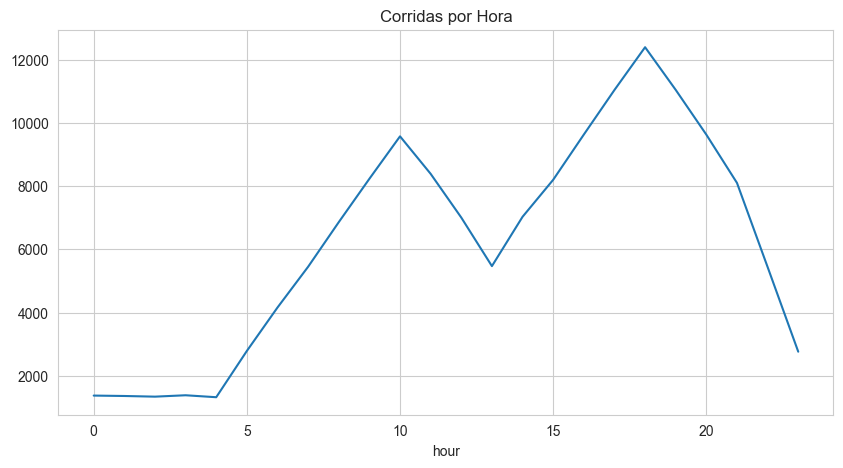

In [15]:
df.groupby("hour").size().plot(kind="line", figsize=(10,5))
plt.title("Corridas por Hora")
plt.show()


#### Corridas por dia da semana

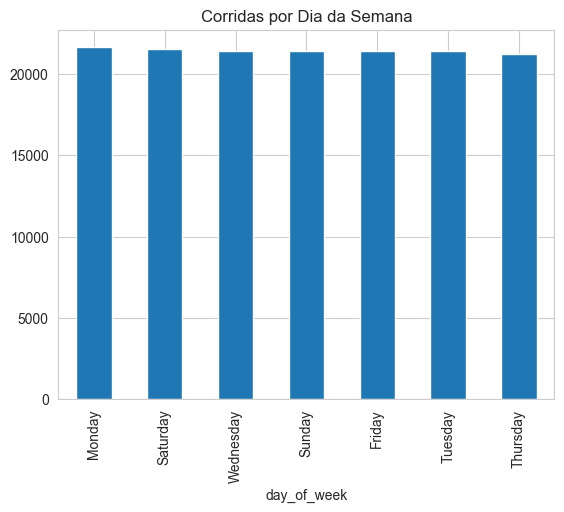

In [16]:
df["day_of_week"].value_counts().plot(kind="bar")
plt.title("Corridas por Dia da Semana")
plt.show()


### Tipos de veículos

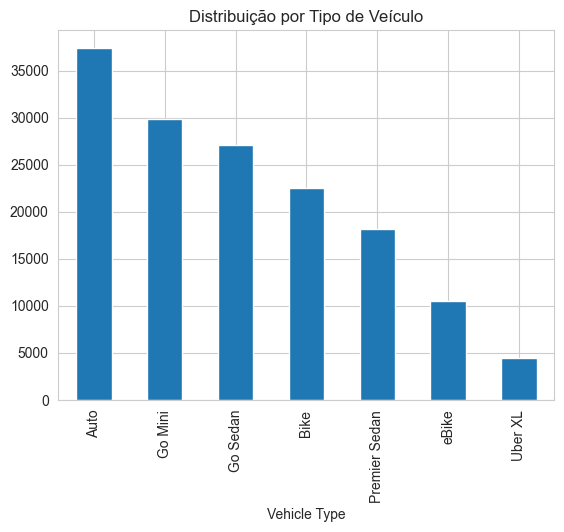

In [17]:
df["Vehicle Type"].value_counts().plot(kind="bar")
plt.title("Distribuição por Tipo de Veículo")
plt.show()


### Receita média

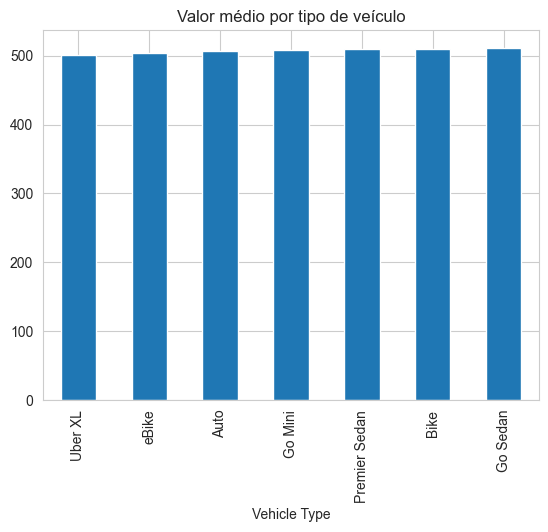

In [18]:
df.groupby("Vehicle Type")["Booking Value"].mean().sort_values().plot(kind="bar")
plt.title("Valor médio por tipo de veículo")
plt.show()


### Cancelamentos

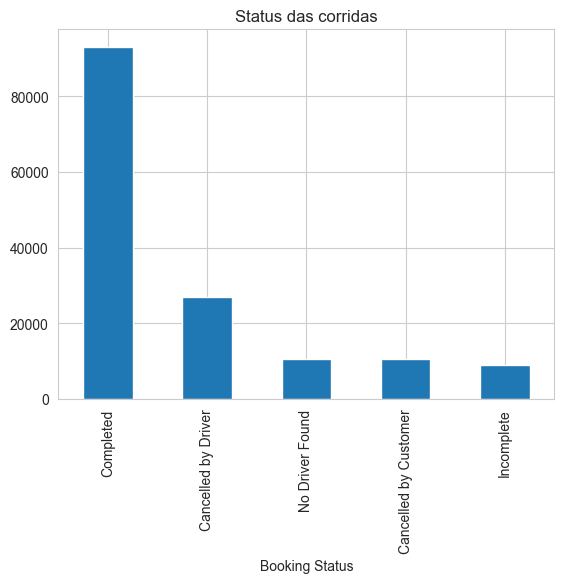

In [19]:
df["Booking Status"].value_counts().plot(kind="bar")
plt.title("Status das corridas")
plt.show()



### Avaliações

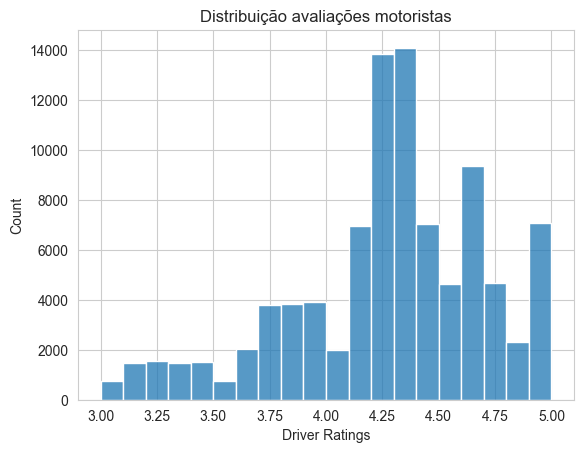

In [20]:
sns.histplot(df["Driver Ratings"].dropna(), bins=20)
plt.title("Distribuição avaliações motoristas")
plt.show()


### Análise Temporal Avançada

Utilizamos heatmap para visualizar a distribuição
de corridas considerando dia da semana e horário,
permitindo identificar períodos de maior demanda.


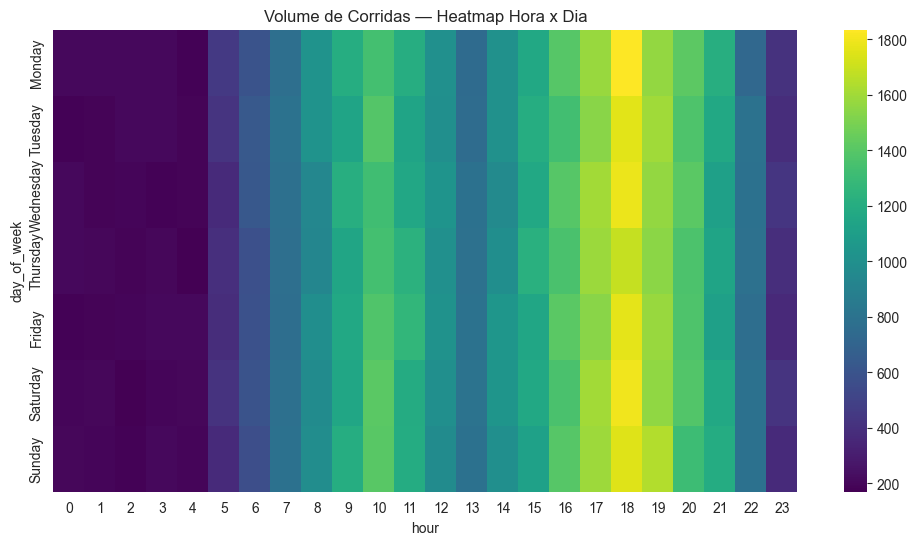

In [28]:
pivot = df.pivot_table(
    index="day_of_week",
    columns="hour",
    values="Booking ID",
    aggfunc="count"
)

order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
pivot = pivot.reindex(order)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="viridis")
plt.title("Volume de Corridas — Heatmap Hora x Dia")
plt.show()


### Cancelamentos por tipo de veículo

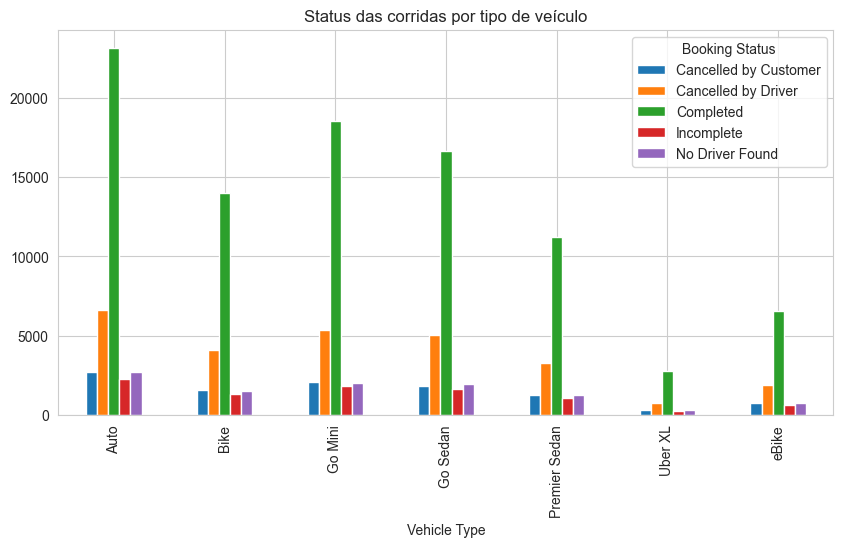

In [23]:
cancel_vehicle = pd.crosstab(
    df["Vehicle Type"],
    df["Booking Status"]
)

cancel_vehicle.plot(kind="bar", figsize=(10,5))
plt.title("Status das corridas por tipo de veículo")
plt.show()


### Relação entre Distância e Valor

Investigamos possível relação entre a distância da corrida
e o valor pago, indicando potencial uso futuro em modelos
de regressão.


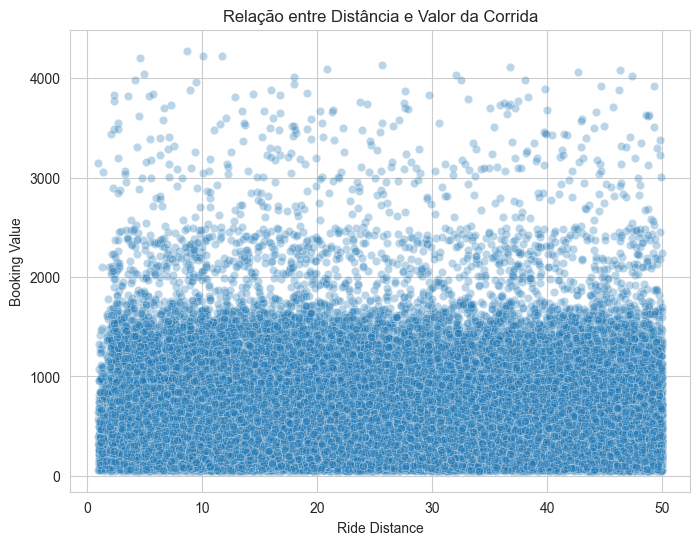

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Ride Distance",
    y="Booking Value",
    alpha=0.3
)

plt.title("Relação entre Distância e Valor da Corrida")
plt.show()


### Tipo de Veículo

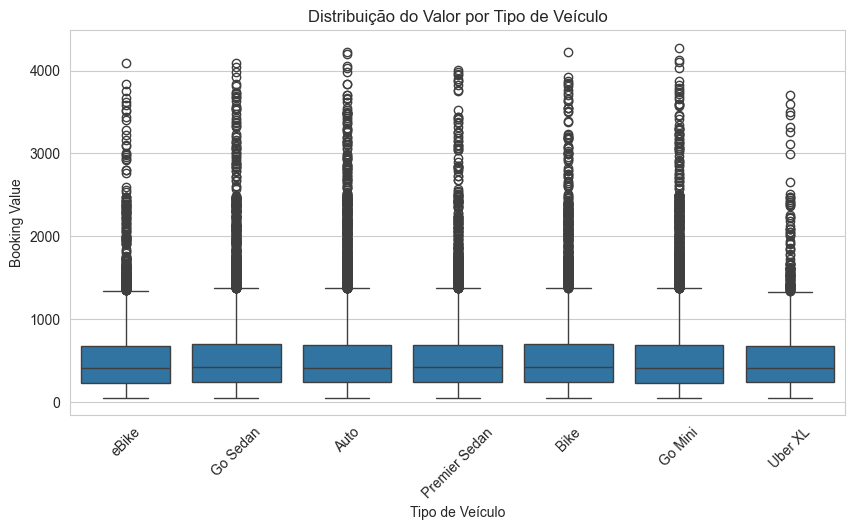

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Vehicle Type", y="Booking Value")
plt.title("Distribuição do Valor por Tipo de Veículo")
plt.xlabel("Tipo de Veículo")
plt.ylabel("Booking Value")
plt.xticks(rotation=45)
plt.show()



## Conclusões

Principais insights:

- Identificação de horários de pico
- Distribuição de veículos
- Padrões de cancelamento
- Relação entre variáveis relevantes

## Possíveis Aplicações em IA

- Previsão de demanda por horário
- Classificação de cancelamentos
- Modelos de estimativa de preço
